<a href="https://colab.research.google.com/github/SaloniJhalani/ChatGPT_Reviews_Sentiment_Analysis/blob/main/ChatGPT_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
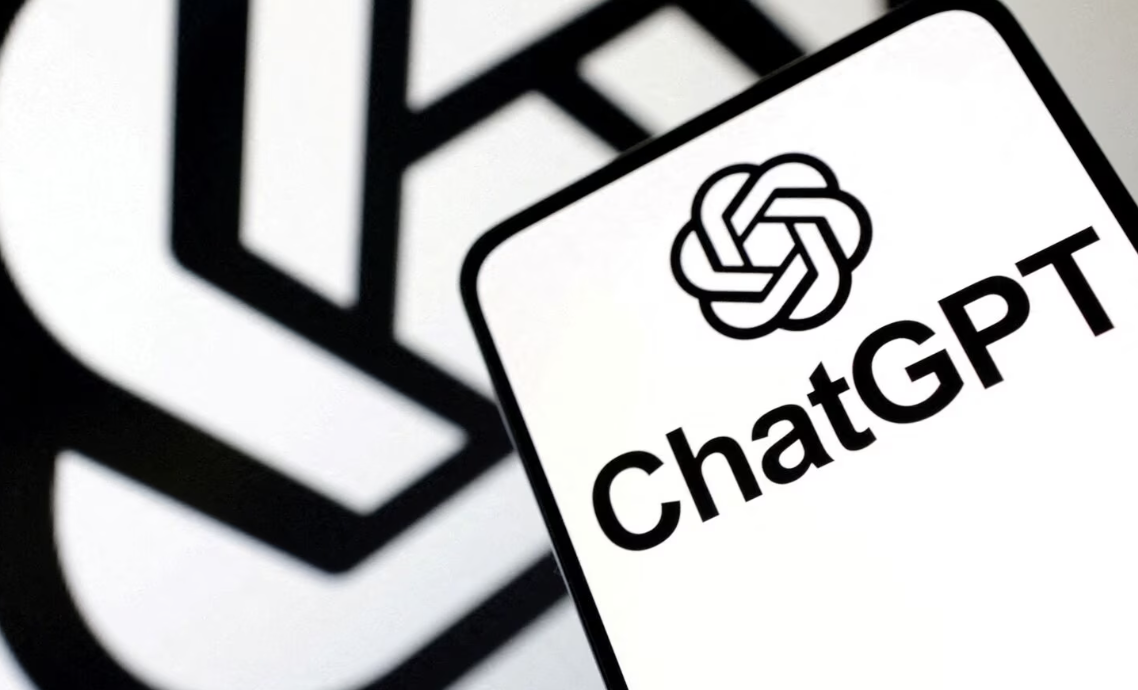

Sentiment analysis involves identifying the sentiment or emotion conveyed in text, such as in reviews or comments. This method is key to understanding users' overall opinions or attitudes towards products, services, or topics. In this project, sentiment analysis focuses specifically on reviews of ChatGPT on iOS.

Data for this analysis is sourced from the App Store, where reviews about ChatGPT are collected. Basic exploratory data analysis (EDA) is conducted to extract insights from the dataset. Several preprocessing steps are applied to clean the text data, such as converting text to lowercase, removing punctuation, emojis, and stop words, and performing lemmatization to convert words to their root forms.

Once preprocessing is completed, word clouds are generated to illustrate the most common words linked to positive, negative, and neutral sentiments. These visualizations offer a quick snapshot of the sentiment patterns in the reviews.

Further preprocessing includes transforming text into numerical form using bag-of-words vectorization. To handle data imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) is used to create additional samples of the minority class.

Then, various classification models are trained and evaluated to identify the most effective model for sentiment classification. Metrics such as precision, recall, and F1 score are used to measure the models' performance in accurately predicting sentiments.

In summary, this project provides a comprehensive approach to sentiment analysis on ChatGPT iOS reviews. Through data cleaning, EDA, and the application of classification models, it aims to gain insights into review sentiments and predict them with reasonable accuracy.



# Import Libraries

In [2]:
!python -m spacy download en
#Import Libraries
from app_store_scraper import AppStore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import json,os,uuid
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 6.6 MB/s eta 0:00:02
     ----- ---------------------------------- 1.8/12.8 MB 5.0 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.8 MB 5.6 MB/s eta 0:00:02
     ------------- -------------------------- 4.5/12.8 MB 5.8 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 5.8 MB/s eta 0:00:02
     ---------------------- ----------------- 7.3/12.8 MB 6.1 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 6.3 MB/s eta 0:00:01
     ------------------------------- -------- 10.0/12.8 MB 6.3 MB/s eta 0:00:01
     ------------------------------------ --- 11.5/12.8 MB 6.3 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 6.3 MB/s eta 0:00:00
✔ Download 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Collection

In [ ]:
#Collect all the ChatGPT reviews from App Store
a_reviews = AppStore(country="in", app_name="chatgpt", app_id="6448311069")
#a_reviews.review(how=2000)
a_reviews.review(sleep=1)

2024-11-12 00:13:22,341 [INFO] Base - Initialised: AppStore('in', 'chatgpt', 6448311069)
2024-11-12 00:13:22,341 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/in/app/chatgpt/id6448311069
2024-11-12 00:13:27,974 [INFO] Base - [id:6448311069] Fetched 100 reviews (100 fetched in total)
2024-11-12 00:13:34,574 [INFO] Base - [id:6448311069] Fetched 220 reviews (220 fetched in total)
2024-11-12 00:13:41,257 [INFO] Base - [id:6448311069] Fetched 340 reviews (340 fetched in total)
2024-11-12 00:13:47,908 [INFO] Base - [id:6448311069] Fetched 460 reviews (460 fetched in total)
2024-11-12 00:13:54,575 [INFO] Base - [id:6448311069] Fetched 580 reviews (580 fetched in total)
2024-11-12 00:14:01,242 [INFO] Base - [id:6448311069] Fetched 700 reviews (700 fetched in total)
2024-11-12 00:14:07,908 [INFO] Base - [id:6448311069] Fetched 820 reviews (820 fetched in total)
2024-11-12 00:14:14,494 [INFO] Base - [id:6448311069] Fetched 940 reviews (940 fetched in total)
2024-11-12 00:14:

In [11]:
data = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,date,review,rating,isEdited,title,userName
0,2024-08-03 23:50:08,“ChatGPT represents the pinnacle of artificial...,5,False,ChatGPT: The Pinnacle of AI Excellence 🔥,Lifeofswali
1,2023-12-14 19:10:17,This can access websites but not every one of ...,3,False,Real time data is the issue.,Lagmator22
2,2023-05-26 09:56:22,ChatGPT is a game-changer in the world of chat...,5,False,Exceptional Conversations with ChatGPT - The U...,Vaibhav Dhamecha
3,2024-07-16 15:30:58,Chad GPT is nice. It gives me answer sometimes...,1,False,Chat Gpt,Wwwzapp
4,2023-05-29 17:34:51,It is working well in iPad… but I’d prefer a n...,5,False,Minor adjustments only… but… SUPERB 👌🎉,nerd the great


In [12]:
data.shape

(2000, 6)

In [13]:
data.drop(['isEdited','userName'],axis=1,inplace=True) #Delete columns
data = data[['date','title','review','rating']] #Rearrange columns
data.head()

,date,title,review,rating
0,2024-08-03 23:50:08,ChatGPT: The Pinnacle of AI Excellence 🔥,“ChatGPT represents the pinnacle of artificial...,5
1,2023-12-14 19:10:17,Real time data is the issue.,This can access websites but not every one of ...,3
2,2023-05-26 09:56:22,Exceptional Conversations with ChatGPT - The U...,ChatGPT is a game-changer in the world of chat...,5
3,2024-07-16 15:30:58,Chat Gpt,Chad GPT is nice. It gives me answer sometimes...,1
4,2023-05-29 17:34:51,Minor adjustments only… but… SUPERB 👌🎉,It is working well in iPad… but I’d prefer a n...,5


In [15]:
#Storing Data
data.to_csv('chatgpt_reviews.csv',index=False)

# Exploratory Data Analysis

In [17]:
data = pd.read_csv('chatgpt_reviews.csv')

In [18]:
data.shape

(2000, 4)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2000 non-null   object
 1   title   2000 non-null   object
 2   review  2000 non-null   object
 3   rating  2000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [20]:
data.describe()

,rating
count,2000.000000
mean,4.274000
std,1.356408
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [21]:
data.describe(include='object')

,date,title,review
count,2000,2000,2000
unique,2000,1592,1931
top,2023-06-01 02:50:05,Review,Excellent
freq,1,48,15


<h3> Analysis of Rating column </h3>

In [22]:
#Rating Distribution
data['rating'].value_counts().sort_index()

rating
1     223
2      66
3     104
4     154
5    1453
Name: count, dtype: int64

In [23]:
data['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

rating
1    11.15
2     3.30
3     5.20
4     7.70
5    72.65
Name: proportion, dtype: float64

2024-11-12 00:24:30,179 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-12 00:24:30,192 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


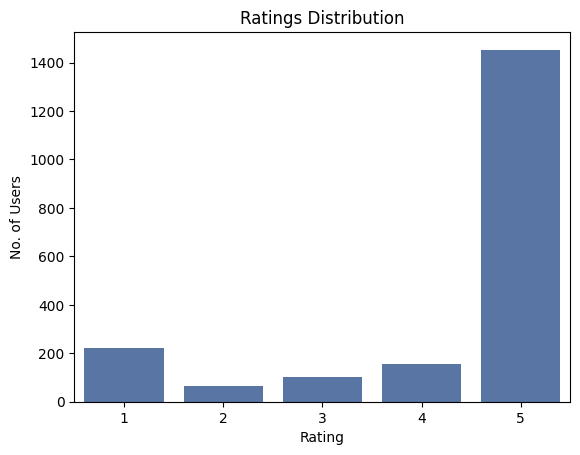

In [24]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.countplot(data=data, x='rating')

plt.xlabel('Rating')
plt.ylabel('No. of Users')
plt.title('Ratings Distribution')

plt.show()

# Data Preprocessing

In [25]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

date      0
title     0
review    0
rating    0
dtype: int64

In [26]:
#Combine Review Time and Review
data['complete_review'] = data['title'] +' .'+data['review']

In [27]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title']
data = data.drop(remove_cols,axis='columns')

In [28]:
data.head()

,rating,complete_review
0,5,ChatGPT: The Pinnacle of AI Excellence 🔥 .“Cha...
1,3,Real time data is the issue. .This can access ...
2,5,Exceptional Conversations with ChatGPT - The U...
3,1,Chat Gpt .Chad GPT is nice. It gives me answer...
4,5,Minor adjustments only… but… SUPERB 👌🎉 .It is ...


1. Convert all the reviews to lowercase

In [29]:
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['complete_review'].head()

0    chatgpt: the pinnacle of ai excellence 🔥 .“cha...
1    real time data is the issue. .this can access ...
2    exceptional conversations with chatgpt - the u...
3    chat gpt .chad gpt is nice. it gives me answer...
4    minor adjustments only… but… superb 👌🎉 .it is ...
Name: complete_review, dtype: object

2. Remove Punctuation

In [30]:
data['complete_review'] = data['complete_review'].str.replace('[^\w\s]','')

3. Remove Emojis

In [31]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['complete_review'] = data['complete_review'].apply(lambda x: remove_emoji(x))

4. Remove Stopwords

Stopwords are commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence and can be ignored without having a drastic effect on the meaning of the sentence.

In [32]:
stop = stopwords.words('english')
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

5. Apply Lemmatization

In [33]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
data['complete_review']= data['complete_review'].apply(space)

6. Remove certain words

  These are specific to app and won't show any sentiments

In [34]:
words_to_remove = ['chatgpt','app','chatgpts','chat','gpt','iphone','ipad','gpt4','phone','number','ai','use','io']
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

7. Map ratings to positive, negative & neutral sentiment

0 will represent negative sentiment

1 will represent neutral sentiment

2 will represent positive sentiment


In [35]:
data['sentiment'] = data['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
data.head(5)

,rating,complete_review,sentiment
0,5,: pinnacle excellence .“chatgpt represent pinn...,2
1,3,real time datum issue . .this access website e...,1
2,5,exceptional conversation - ultimate chatbot .c...,2
3,1,".chad nice . give answer sometimes , come phot...",0
4,5,minor adjustment only … but … superb .it work ...,2


In [36]:
data['sentiment'].value_counts(normalize=True).mul(100).round(2)

sentiment
2    80.35
0    14.45
1     5.20
Name: proportion, dtype: float64

Data is Imbalanced as about 80.35% of sentiment is positive, 14.45% is negative and 5.2% is neutral.

# Reviews Analysis

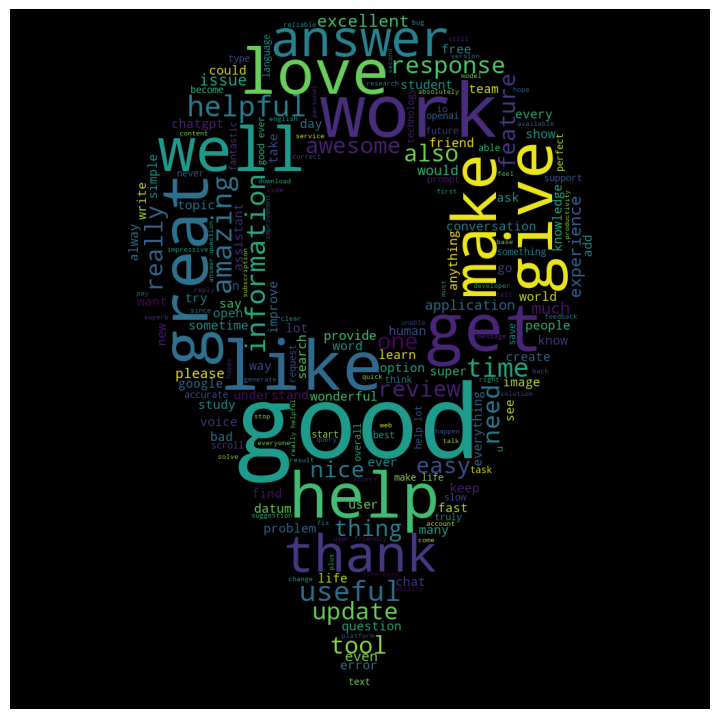

In [37]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in data.complete_review)
mask = np.array(Image.open("./loc.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('review_sentiment.png')
plt.show()

In [38]:
#positive negative & neutral sentiment:
positive = data[data['sentiment'] == 2]
negative = data[data['sentiment'] == 0]
neutral = data[data['sentiment'] == 1]

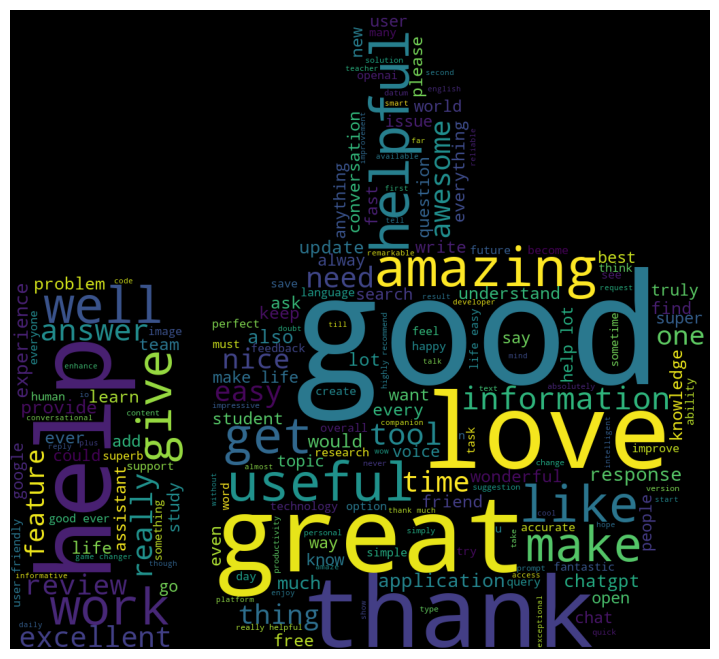

In [39]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
mask = np.array(Image.open("./thumbs_up.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_sentiment.png')
plt.show()

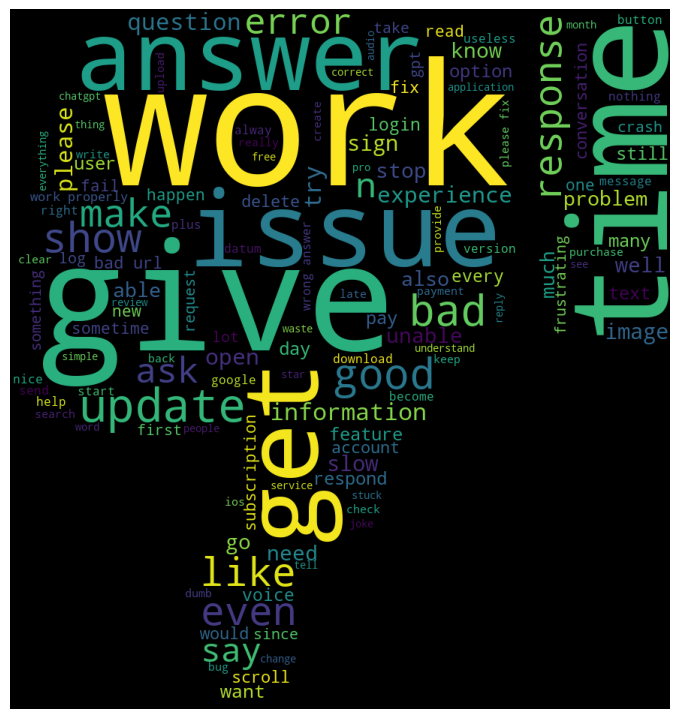

In [40]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
mask = np.array(Image.open("./thumbs_down.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_sentiment.png')
plt.show()

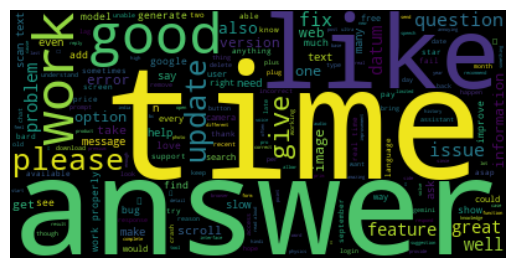

In [41]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis Model

<h3> Bag of Word Vectorization </h3>

In [42]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(data['complete_review'])
y = data['sentiment']

<h3> Handle Imbalanced Data </h3>

In [43]:
# Instantiate the SMOTE object
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

<h3> Train Test Split </h3>

In [44]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,
                                                  y_oversampled,
                                                  test_size=0.15,
                                                  random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4097, 3289)
(724, 3289)
(4097,)
(724,)


<h3> Multinomial Naive Bayes </h3>

In [45]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
y_pred = MNB.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       293
           1       0.51      0.66      0.57       187
           2       0.83      0.82      0.83       244

    accuracy                           0.70       724
   macro avg       0.70      0.70      0.70       724
weighted avg       0.72      0.70      0.71       724



<h3> Logistic Regression </h3>

In [46]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.85      0.73       178
           1       0.93      0.67      0.78       335
           2       0.80      0.91      0.85       211

    accuracy                           0.79       724
   macro avg       0.79      0.81      0.78       724
weighted avg       0.82      0.79      0.79       724



<h3> Random Forest </h3>

In [47]:
# Initialize and train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       210
           1       0.90      0.70      0.79       313
           2       0.76      0.91      0.82       201

    accuracy                           0.79       724
   macro avg       0.79      0.81      0.79       724
weighted avg       0.81      0.79      0.79       724



<h3> XGBoost </h3>

In [48]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]

print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       234
           1       0.97      0.99      0.98       238
           2       0.95      0.91      0.93       252

    accuracy                           0.95       724
   macro avg       0.95      0.95      0.95       724
weighted avg       0.95      0.95      0.95       724



#Conclusion

The best-performing model was identified as XGBoost, which achieved an accuracy of 95% with the f1-score of 0.93 and above for all the labels(positive,negative & neutral). This model demonstrates the ability to accurately predict sentiment based on ChatGPT iOS reviews.

Overall, with the developed sentiment analysis model, we can effectively analyze and understand the sentiment expressed in ChatGPT reviews. This provides valuable insights for businesses, helping them make informed decisions, improve customer satisfaction, and enhance their products and services based on customer feedback.